In [1]:
import os
import pickle
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Dynamically set the CWD
froot = os.getcwd()

# Load the XGB hyperparameters and game state shot splits
n_itr = 500
param_path = f'/../../data/goal_prob_model/hyperparameter_search_{n_itr}itr.pkl'
with open(froot + param_path, 'rb') as f:
    hyperparameter_data = pickle.load(f)
state_lbls = ['Even', 'PP', 'PK']
n_states = len(state_lbls)
cv_params = hyperparameter_data['cv_params']
cv_scores = hyperparameter_data['cv_scores']
param_ranges = hyperparameter_data['xgb_params']
print(list(param_ranges.keys()))


['n_estimators', 'learning_rate', 'subsample', 'min_child_weight', 'max_leaves', 'max_depth', 'lambda', 'gamma']


In [3]:
# Convert the parameter sets to a dataframe
param_df = [pd.DataFrame(cv_params[state], columns=cv_params[state][0].keys()) for state in state_lbls]

# Convert negative logloss to positive and find max values
for state in state_lbls:
    cv_scores[state] = [-score for score in cv_scores[state]]
max_scores = [max(cv_scores[state]) for state in state_lbls]


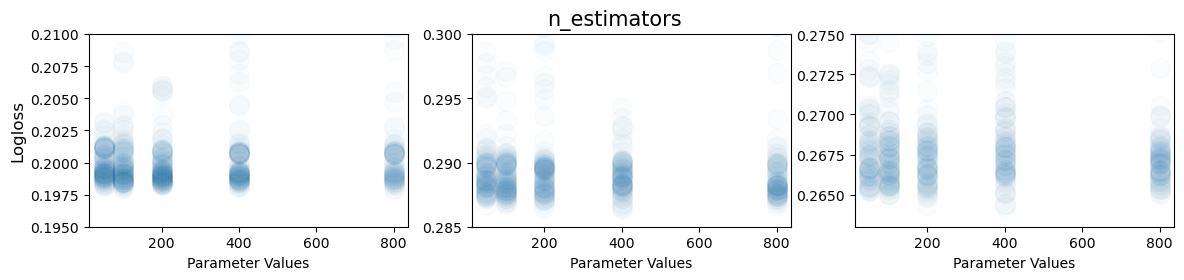

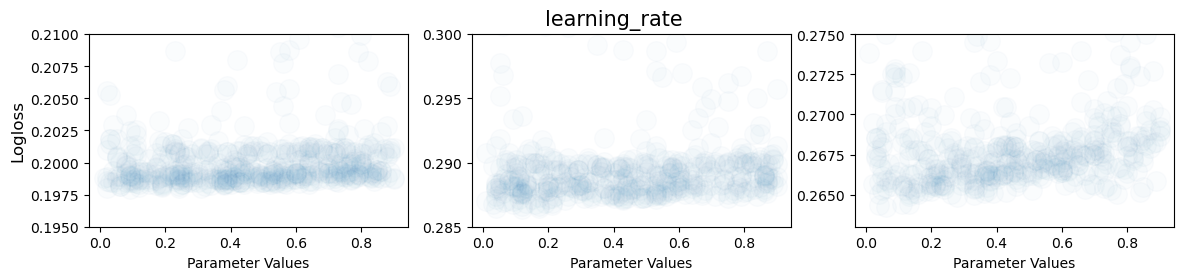

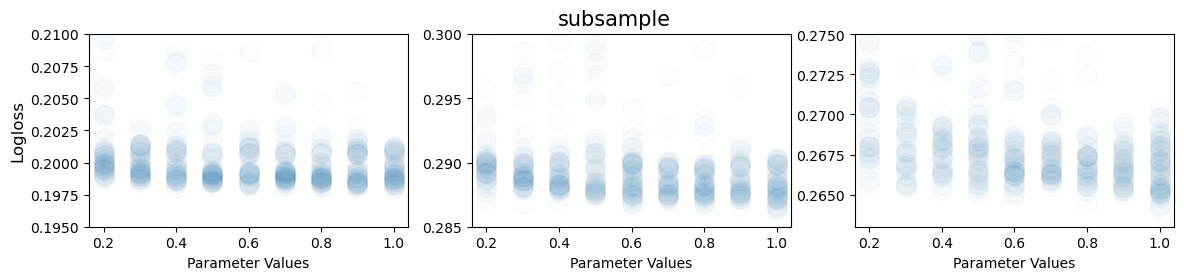

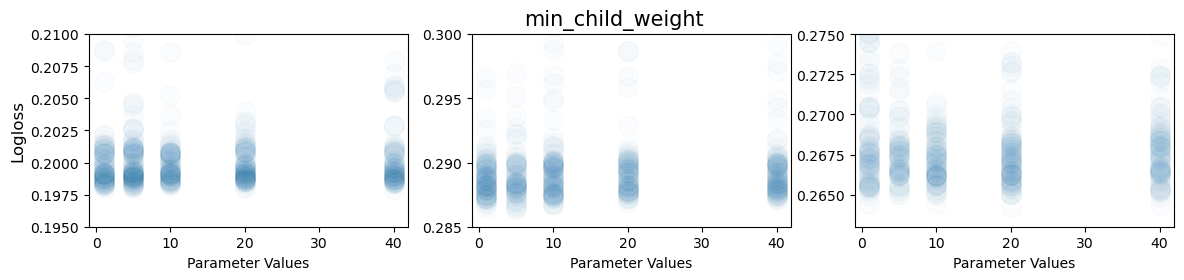

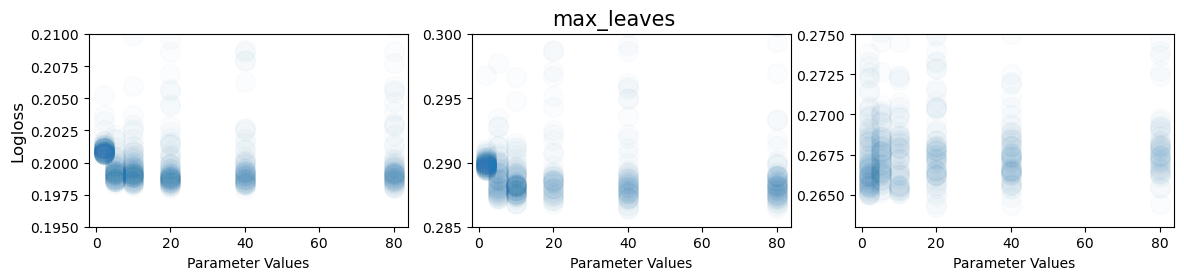

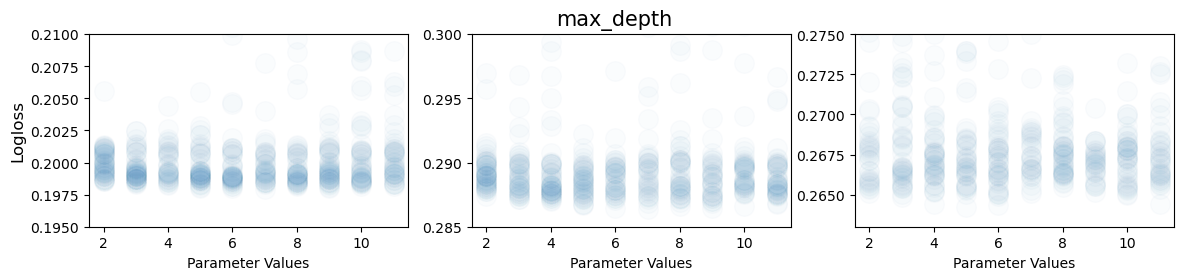

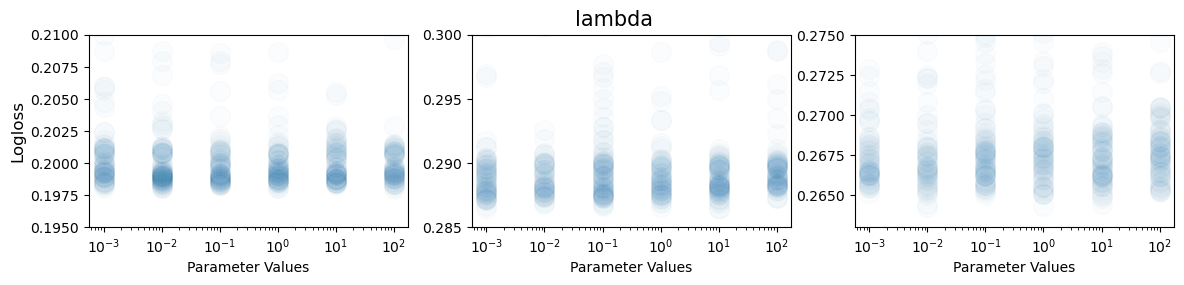

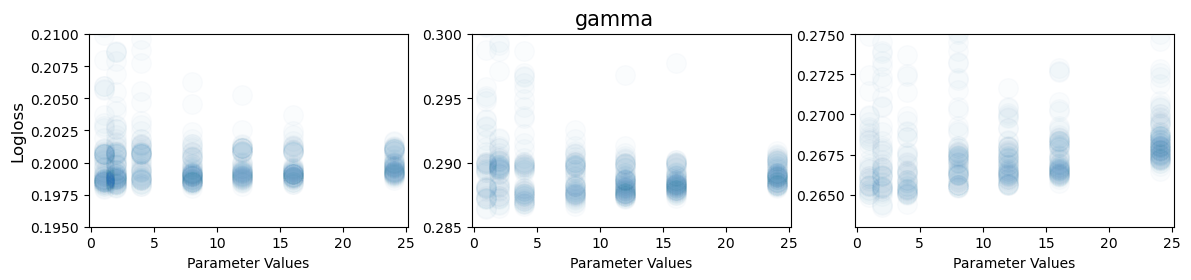

In [6]:
for p, param in enumerate(param_ranges.keys()):
    fig, axes = plt.subplots(1, len(state_lbls), figsize=(14, 2.5))
    param_range = param_ranges[param]
    for i, state in enumerate(state_lbls):
        axes[i].scatter(param_df[i][param], cv_scores[state], alpha=0.02, s=200)
        axes[i].set_xlabel('Parameter Values', fontsize=10)
        if p == 6:
            axes[i].set_xscale('log')
        # if p not in [1, 2, 5]:
        #     axes[i].set_xscale('log')
        #     axes[i].set_xticks(param_range)
        #     axes[i].set_xticklabels([f'{param:1.0e}' for param in param_range], fontsize=8)
        # elif p == 1:
        #     axes[i].set_xticks(param_range[::10])
        # else:
        #     axes[i].set_xticks(param_range)
        if i == 0:
            axes[i].set_ylim([0.195, 0.21])
        elif i == 1:
            axes[i].set_ylim([0.285, 0.3])
        elif i == 2:
            axes[i].set_ylim([0.263, 0.275])
    axes[0].set_ylabel('Logloss', fontsize=12)
    fig.suptitle(f'{param}', fontsize=15)
    

In [12]:
# Display the top parameter sets to see relationships
for i, state in enumerate(state_lbls):
    print(f'Results for the {state} state')
    display(pd.concat([param_df[i][:20], pd.Series(cv_scores[state][:20])], axis=1))


Results for the Even state
<class 'list'>


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,1.0,800,40,40,7,0.09,100.000,1,0.197978
1,1.0,100,20,80,5,0.24,0.010,1,0.198029
2,0.4,800,1,20,6,0.02,1.000,2,0.198049
3,0.9,100,5,80,9,0.31,0.010,8,0.198055
4,0.7,400,5,20,5,0.12,1.000,2,0.198059
5,0.8,50,20,80,9,0.19,0.001,2,0.198067
6,0.9,400,5,80,8,0.06,0.010,12,0.198138
7,0.6,100,5,40,6,0.24,100.000,1,0.198154
8,0.8,400,5,10,6,0.19,0.010,1,0.198157
9,0.8,100,1,80,10,0.06,1.000,4,0.198171


Results for the PP state
<class 'list'>


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,1.0,400,5,40,7,0.12,0.001,1,0.286419
1,1.0,400,1,80,9,0.04,10.000,2,0.286432
2,1.0,200,5,40,6,0.17,10.000,1,0.286487
3,1.0,400,5,80,8,0.12,1.000,4,0.286579
4,0.9,800,5,40,10,0.17,0.001,8,0.286641
5,1.0,50,10,40,5,0.21,0.100,2,0.286658
6,0.3,400,1,20,5,0.03,0.100,4,0.286748
7,0.8,100,10,80,5,0.16,0.010,2,0.286801
8,0.6,200,10,10,11,0.09,0.100,4,0.286801
9,0.6,400,10,80,9,0.19,10.000,8,0.286875


Results for the PK state
<class 'list'>


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,1.0,400,20,20,5,0.06,0.010,2,0.264253
1,1.0,200,40,40,6,0.04,1.000,2,0.264333
2,1.0,400,1,20,11,0.11,0.010,2,0.264437
3,0.8,400,10,80,4,0.13,10.000,4,0.264445
4,1.0,200,40,40,3,0.28,10.000,1,0.264846
5,1.0,200,1,20,6,0.13,10.000,2,0.264910
6,0.9,100,10,2,10,0.33,0.010,4,0.265008
7,1.0,100,5,2,3,0.26,10.000,1,0.265021
8,1.0,800,20,2,5,0.77,0.100,1,0.265023
9,0.6,200,5,2,6,0.13,1.000,4,0.265036
